In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy

import glob

wave_files = glob.glob("*.wav")

In [2]:
for wave_file in wave_files:
    break
wave_file

'audio_8000Hz_signed16.wav'

In [3]:
wvf = wave.open(wave_file)

In [4]:
wvf

In [5]:
for attr in dir(wvf):
    if attr.startswith("_"):
        continue
    if attr.startswith("get"):
        try:
            value = getattr(wvf, attr)()
            print(f"{attr}:{value}")
        except:
            print(f"{attr}:FAIL")

getcompname:not compressed
getcomptype:NONE
getfp:<chunk.Chunk object at 0x7fcea8618460>
getframerate:8000
getmark:FAIL
getmarkers:None
getnchannels:2
getnframes:14001
getparams:_wave_params(nchannels=2, sampwidth=2, framerate=8000, nframes=14001, comptype='NONE', compname='not compressed')
getsampwidth:2


In [6]:
wave

<module 'wave' from '/usr/lib/python3.8/wave.py'>

In [7]:
from wave import Wave_read

In [9]:
wvf.rewind()
signal = wvf.readframes(-1)
signal = np.frombuffer(signal, np.int16)

channels = [[] for channel in range(wvf.getnchannels())]
for index, datum in enumerate(signal):
    channels[index%len(channels)].append(datum)

In [10]:
len(signal)

28002

In [11]:
len(signal)/2

14001.0

In [16]:
for idx, channel in enumerate(channels):
    print(f"Chan {idx+1}:")
    print(f"\t{channel[0]}")
    print(f"\t{channel[1]}")
    

Chan 1:
	189
	368
Chan 2:
	101
	114


In [17]:
channels2=np.reshape(signal, (int(len(signal)/2),2), order="A")
channels2

array([[ 189,  101],
       [ 368,  114],
       [ 341,  121],
       ...,
       [-792,  299],
       [-615,  369],
       [-632,  536]], dtype=int16)

In [18]:
fs = wvf.getframerate()

In [19]:
fs

8000

In [20]:
Time=np.linspace(0, len(signal)/len(channels)/fs, num=int(len(signal)/len(channels)))

In [21]:
len(Time)

14001

In [22]:
len(channel)

14001

In [23]:
Time[-1]

1.750125

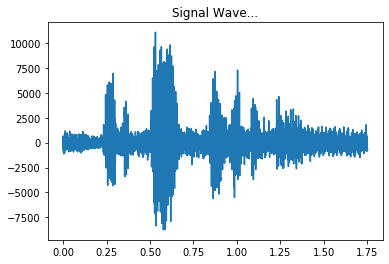

In [24]:
#Plot
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,channels[0])
plt.show()

In [25]:
max_x = 100
max_y = 50

In [26]:
scale_x = max_x/Time[-1]
scale_y = max_y/np.max(np.abs(channel))

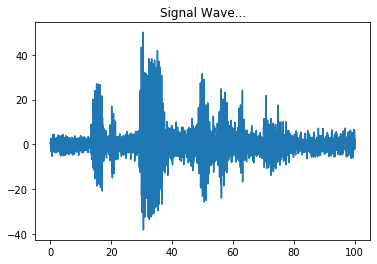

In [27]:
#Plot
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time*scale_x,channels2[:,1]*scale_y)
plt.show()

In [28]:
channels2[:,1]

array([101, 114, 121, ..., 299, 369, 536], dtype=int16)

In [29]:
x = channels2[:,1]

In [30]:
x[:]

array([101, 114, 121, ..., 299, 369, 536], dtype=int16)

In [31]:
len(x[:])

14001

In [32]:
y = x[range(0, len(x), 2)]

In [33]:
len(y)

7001

In [34]:
max_x

100

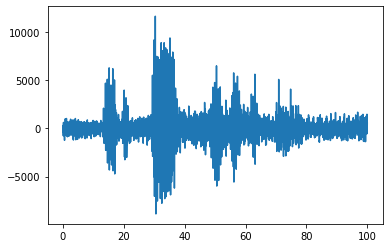

In [35]:
plt.plot(np.linspace(0, max_x, len(y)), y)

In [36]:
np.linspace(0, 100, 50)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [37]:
plot_lines_x = np.linspace(0, 100, 50)

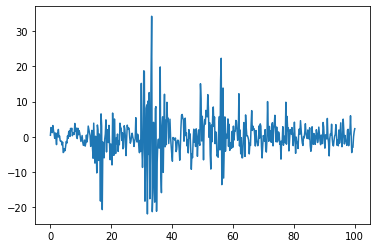

In [39]:
plot_lines_x = np.linspace(0, 100, 500)
plot_lines_y = np.interp(plot_lines_x, Time*scale_x,channels2[:,1]*scale_y)
plt.plot(plot_lines_x, plot_lines_y)

In [40]:
channels2[:,1]

array([101, 114, 121, ..., 299, 369, 536], dtype=int16)

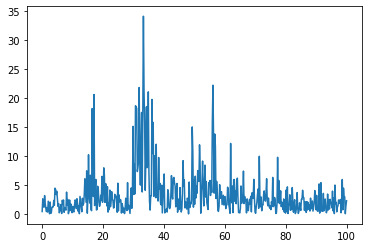

In [41]:
plt.plot(plot_lines_x, np.abs(plot_lines_y))

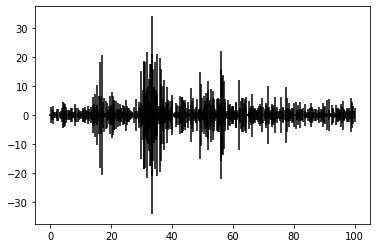

In [42]:
for idx, line in enumerate(np.abs(plot_lines_y)):
    plt.vlines(plot_lines_x[idx], -line, line)

In [43]:
import gcode

In [44]:
prog.

SyntaxError: invalid syntax (<ipython-input-44-21567d68e825>, line 1)

In [45]:
prog = gcode.GCode()
for n in range(10):
    prog.G0(X=n)

In [46]:
prog

<GCode>[cmds=10]

In [51]:
prog = gcode.GCode()
for idx, Y in enumerate(np.abs(plot_lines_y)):
    X=plot_lines_x[idx]
    prog.G0(X=X, Y=-Y)
    prog.M4(S=150)
    prog.G1(X=X, Y=-Y)
    prog.G1(X=X, Y=Y)
    prog.M5()
    break

In [54]:
prog.buffer[0]

'G0X0.0Y-0.4333'